# 감정대화 말뭉치 Dataset 만들기

- 소스: https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&dataSetSn=86


## EDA 및 전처리

### 라이브러리 불러오기

In [2]:
#라이브러리 불러오기 
import numpy as np 
import pandas as pd 

In [4]:
#[AI HUB] 감정대화 말뭉치 감정 분류를 위한 음성 데이터셋 불러오기 
data = pd.read_csv("./data/5차년도_2차.csv", encoding='cp949')

In [6]:
data.head(5)

,wav_id,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번감정세기,5번 감정,5번 감정세기,나이,성별
0,5f4141e29dd513131eacee2f,헐! 나 이벤트에 당첨 됐어.,happiness,angry,2,surprise,2,happiness,2,happiness,2,happiness,2,48,female
1,5f4141f59dd513131eacee30,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness,neutral,0,happiness,2,happiness,2,happiness,2,happiness,2,48,female
2,5f4142119dd513131eacee31,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness,angry,2,happiness,2,happiness,2,happiness,2,happiness,2,48,female
3,5f4142279dd513131eacee32,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",happiness,angry,2,happiness,2,happiness,2,happiness,2,happiness,1,48,female
4,5f3c9ed98a3c1005aa97c4bd,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,neutral,happiness,2,happiness,1,happiness,2,happiness,1,happiness,1,48,female


In [7]:
data.shape

(19374, 15)

In [11]:
dfShort = data[['발화문','상황']]

In [12]:
dfShort.rename(columns= {'발화문':'chat', '상황':'emotion'}, inplace = True)

/var/folders/kf/1pjsgwnd38n0sthq884sg0qc0000gn/T/ipykernel_67544/1865290481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfShort.rename(columns= {'발화문':'chat', '상황':'emotion'}, inplace = True)


In [13]:
dfShort

,chat,emotion
0,헐! 나 이벤트에 당첨 됐어.,happiness
1,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness
2,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness
3,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",happiness
4,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,neutral
...,...,...
19369,나 엘리베이터에 갇혔어.,fear
19370,하지만 기분이 나쁜 걸 어떡해?,angry
19371,자취방 엘리베이턴데 정전인가봐.,fear
19372,나 드디어 프로젝트 끝났어!,happiness


## 두번째 데이터 통합

In [22]:
# [AI Hub] 감정 분류를 위한 대화 음성 데이터셋 불러오기
data2 = pd.read_csv('./data/감성대화말뭉치(최종데이터)_Training.csv')

In [23]:
data2.head()

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,5,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN


In [24]:
data2.shape

(51630, 13)

In [28]:
data2 = data2.rename(columns={'사람문장1':'chat', '감정_대분류':'emotion'})

In [29]:
dataShort2 = data2[['chat','emotion']]

In [31]:
# AI-HUB 감정 및 발화스타일 동시 고려 음성 합성(대화체만 사용)
import os
import json

path = "./data/json"
file_list = os.listdir(path)
print("file_list {}".format(file_list))

file_list ['D-NX01-P03-D-014.json', 'D-S302-P05-A-007.json', 'D-H202-P05-D-023.json', 'D-A302-P05-D-010.json', 'D-A102-P05-E-043.json', 'D-NX03-P09-A-016.json', 'D-H203-P07-A-026.json', 'D-S305-P13-E-055.json', 'D-NY02-P04-C-034.json', 'D-H305-P15-C-011.json', 'D-A203-P09-C-054.json', 'D-H205-P15-A-069.json', 'D-S101-P03-G-041.json', 'D-NX02-P05-C-001.json', 'D-S302-P04-F-068.json', 'D-H205-P14-C-024.json', 'D-H103-P09-C-034.json', 'D-NY04-P10-G-041.json', 'D-NX05-P14-D-051.json', 'D-H204-P11-D-023.json', 'D-NX06-P16-D-010.json', 'D-S101-P03-C-034.json', 'D-S304-P11-A-007.json', 'D-H103-P09-G-041.json', 'D-H205-P13-A-026.json', 'D-A105-P14-F-031.json', 'D-H302-P04-A-063.json', 'D-NY04-P10-C-034.json', 'D-S303-P07-E-055.json', 'D-A304-P11-D-010.json', 'D-A103-P08-B-065.json', 'D-A104-P11-E-043.json', 'D-NX04-P11-C-001.json', 'D-S304-P10-F-068.json', 'D-S105-P15-D-049.json', 'D-H302-P05-D-005.json', 'D-H305-P14-E-029.json', 'D-S203-P08-D-059.json', 'D-NY02-P04-G-041.json', 'D-A303-P09-B-

In [32]:
len(file_list)

2860

In [33]:
data3 = pd.DataFrame(columns=['chat','emotion'])

In [34]:
#데이터 불러와서 data3에 저장하는 명령
i = 0 

for fileName in file_list:
    fullFile = path + "/" + fileName
    i = i + 1
    print( str(i) + ' - ' + fullFile )
    
    with open(fullFile, 'r', encoding='UTF8') as file:
        json_data = json.load(file)

        # print('data =', json_data)

        text_info = json_data[0]['sentences']

        for info in text_info:
            # print('info = ', info)
            text = info['origin_text']
            emotion = info['style']['emotion']

            # print(text)
            # print(emotion)

            pos = data3['chat'].count()

            data3.loc[pos]=[text, emotion]

1 - ./data/json/D-NX01-P03-D-014.json
2 - ./data/json/D-S302-P05-A-007.json
3 - ./data/json/D-H202-P05-D-023.json
4 - ./data/json/D-A302-P05-D-010.json
5 - ./data/json/D-A102-P05-E-043.json
6 - ./data/json/D-NX03-P09-A-016.json
7 - ./data/json/D-H203-P07-A-026.json
8 - ./data/json/D-S305-P13-E-055.json
9 - ./data/json/D-NY02-P04-C-034.json
10 - ./data/json/D-H305-P15-C-011.json
11 - ./data/json/D-A203-P09-C-054.json
12 - ./data/json/D-H205-P15-A-069.json
13 - ./data/json/D-S101-P03-G-041.json
14 - ./data/json/D-NX02-P05-C-001.json
15 - ./data/json/D-S302-P04-F-068.json
16 - ./data/json/D-H205-P14-C-024.json
17 - ./data/json/D-H103-P09-C-034.json
18 - ./data/json/D-NY04-P10-G-041.json
19 - ./data/json/D-NX05-P14-D-051.json
20 - ./data/json/D-H204-P11-D-023.json
21 - ./data/json/D-NX06-P16-D-010.json
22 - ./data/json/D-S101-P03-C-034.json
23 - ./data/json/D-S304-P11-A-007.json
24 - ./data/json/D-H103-P09-G-041.json
25 - ./data/json/D-H205-P13-A-026.json
26 - ./data/json/D-A105-P14-F-031.

In [41]:
data3.shape

(136658, 2)

In [42]:
#병함 3개의 데이터셋을 하나로 병합 
total_df = pd.concat([dfShort, dataShort2,data3])

In [43]:
total_df

,chat,emotion
0,헐! 나 이벤트에 당첨 됐어.,happiness
1,내가 좋아하는 인플루언서가 이벤트를 하더라고. 그래서 그냥 신청 한번 해봤지.,happiness
2,"한 명 뽑는 거였는데, 그게 바로 내가 된 거야.",happiness
3,"당연히 마음에 드는 선물이니깐, 이벤트에 내가 신청 한번 해본 거지. 비싼 거야. ...",happiness
4,에피타이저 정말 좋아해. 그 것도 괜찮은 생각인 것 같애.,neutral
...,...,...
136653,또는 장어를 질식시켜 죽이는 비천한 영혼보다 덜 심각한 겁니다…,분노
136654,장어는 고귀한 거예요!,분노
136655,그 피가 흘러야 하는 겁니다!,분노
136656,정말 견디기 힘든 사람이군!,분노


In [44]:
#Index 값이 틀어지는 문제를 발견할 수 있기 때문에 rest_index를 해주면 될 것 같다: 
total_df = total_df.reset_index() 

In [45]:
#인덱스를 제외한 최종본
total_df = total_df[['chat','emotion']]

In [46]:
#파일로 저장
total_df.to_csv("./total_df.csv")

In [47]:
#emotion의 종류를 확인 
total_df['emotion'].unique()

array(['happiness', 'neutral', 'sadness', 'angry', 'surprise', 'disgust',
       'fear', '분노', '기쁨', '불안', '당황', '슬픔', '상처', '무감정'], dtype=object)

In [48]:
total_df.loc[total_df['emotion']=='기쁨', 'emotion'] = 'happiness'

In [49]:
total_df.loc[total_df['emotion']=='무감정', 'emotion'] = 'neutral'

In [50]:
total_df.loc[total_df['emotion']=='슬픔', 'emotion'] = 'sadness'

In [51]:
total_df.loc[total_df['emotion']=='분노', 'emotion'] = 'angry'

In [52]:
total_df.loc[total_df['emotion']=='당황', 'emotion'] = 'surprise'

In [53]:
total_df.loc[total_df['emotion']=='불안', 'emotion'] = 'fear'

In [54]:
total_df.loc[total_df['emotion']=='상처', 'emotion'] = 'disgust'

## 시각화

In [57]:
import seaborn as sns 

<Axes: xlabel='emotion', ylabel='Count'>

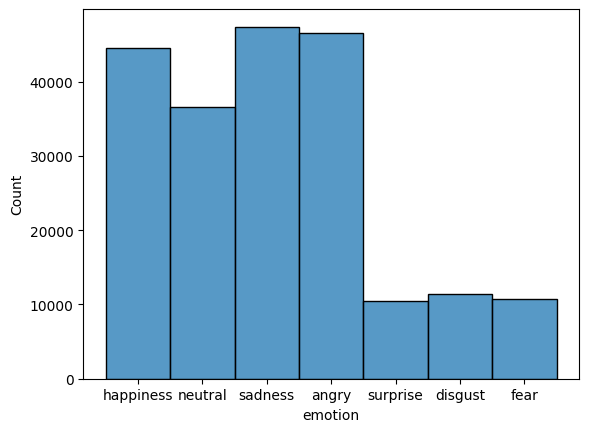

In [58]:
sns.histplot(data=total_df, x='emotion')